In [136]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from scipy.interpolate import UnivariateSpline
from collections import OrderedDict
%matplotlib inline

In [165]:
df = pd.read_csv('trade_1975.csv')
df['ImEx'] = df['Importer']+" "+df['Exporter']

In [349]:
df.head()

,Unnamed: 0,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,ImEx
0,0,1975.0,II,Testudo hermanni,Reptilia,Testudines,Testudinidae,Testudo,CH,YU,NaN,600.0,NaN,live,NaN,T,NaN,CH YU
1,1,1975.0,I,Alligator mississippiensis,Reptilia,Crocodylia,Alligatoridae,Alligator,CH,DE,NaN,16.0,NaN,skins,NaN,NaN,NaN,CH DE
2,2,1975.0,I,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,CH,DE,NaN,12.0,NaN,skins,NaN,NaN,NaN,CH DE
3,3,1975.0,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CH,DE,NaN,1.0,NaN,live,NaN,Q,NaN,CH DE
4,4,1975.0,I,Panthera pardus,Mammalia,Carnivora,Felidae,Panthera,CA,DE,NaN,3.0,NaN,live,NaN,Z,NaN,CA DE


In [171]:
df_new = df.groupby(['ImEx']).count()

In [192]:
df_new.head()

,Unnamed: 0,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
ImEx,,,,,,,,,,,,,,,,,
BE CA,2,2,2,2,2,2,2,1,2,2,0,0,2,2,0,0,0
BM CR,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0
CA DE,4,4,4,4,4,4,4,3,4,4,2,4,0,4,0,1,0
CA DK,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0
CA GB,3,3,3,3,3,3,3,3,3,3,3,3,0,3,0,0,0


In [210]:
df_new1 = df_new[[0]]

In [211]:
df_new1['ImEx'] = df_new1.index
df_new1 = pd.DataFrame(df_new1.values)
df_new1.columns = ['trade_vol','ImEx']
df_new1.head()

/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,trade_vol,ImEx
0,2,BE CA
1,1,BM CR
2,4,CA DE
3,1,CA DK
4,3,CA GB


In [212]:
df_split = pd.DataFrame(df_new1.ImEx.str.split(' ',1).tolist(),columns = ['Im','Ex'])

In [213]:
df_concat = pd.concat([df_new1, df_split], axis = 1)
df_concat.head()

,trade_vol,ImEx,Im,Ex
0,2,BE CA,BE,CA
1,1,BM CR,BM,CR
2,4,CA DE,CA,DE
3,1,CA DK,CA,DK
4,3,CA GB,CA,GB


In [246]:
df_concat

,trade_vol,ImEx,Im,Ex
0,2,BE CA,BE,CA
1,1,BM CR,BM,CR
2,4,CA DE,CA,DE
3,1,CA DK,CA,DK
4,3,CA GB,CA,GB
5,1,CA NZ,CA,NZ
6,3,CA US,CA,US
7,1,CD CA,CD,CA
8,2,CH BE,CH,BE
9,1,CH BW,CH,BW


In [354]:
# create a direct graph with Im Ex country code and trade_vol
G = nx.from_pandas_dataframe(df_concat, 'Im', 'Ex', ['trade_vol', 'ImEx'], create_using=nx.DiGraph())

In [312]:
# Calculate centrality of matrix G 
# with the trade_vol as weights
# ec = nx.eigenvector_centrality_numpy(G, weight='trade_vol')
ec = nx.degree_centrality(G)

# Set this as a node attribute for each node
nx.set_node_attributes(G, 'cent', ec)

# Use this measure to determine the node color in viz
node_color = [float(G.node[v]['cent']) for v in G]

In [332]:
print node_color

[0.06060606060606061, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.09090909090909091, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.7878787878787878, 0.030303030303030304, 0.36363636363636365, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.12121212121212122, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.030303030303030304, 0.09090909090909091, 0.030303030303030304, 0.030303030303030304]


In [309]:
# Blank dictionary to store total exports
totimp = {}

# Calculate total imports of each country in the network
for imp in G.nodes(): 
     tx=sum([float(g) for imp,ex,g in G.out_edges_iter(imp, 'trade_vol')])
     totimp[imp] = tx
     avgexp = np.mean(tx)
nx.set_node_attributes(G, 'totimp', totimp)

# Use the results later for the node's size in the graph
node_size = [float(G.node[v]['totimp'])*10 / avgexp for v in G]

In [310]:
print node_size

[20.0, 0.0, 0.0, 0.0, 10.0, 30.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 820.0, 0.0, 120.0, 0.0, 10.0, 280.0, 20.0, 0.0, 0.0, 0.0, 0.0, 80.0, 0.0, 10.0]


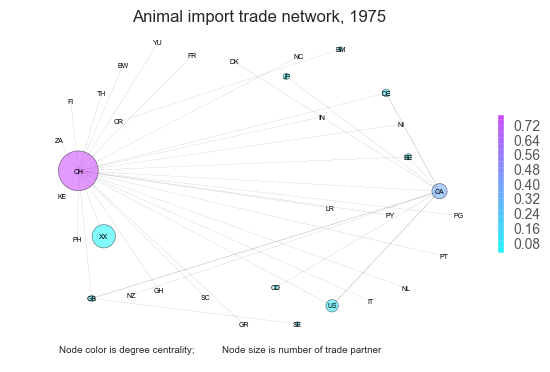

In [347]:
# Visualization
# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G,k=30,iterations=8) 

# Draw nodes
nodes = nx.draw_networkx_nodes(G,pos, node_size=node_size, \
                               node_color=node_color, alpha=0.5, cmap=plt.get_cmap('cool')) 
# Draw edges
edges = nx.draw_networkx_edges(G, pos, edge_color='black', \
                               arrows=False, width=0.05,)

# Add labels
nx.draw_networkx_labels(G,pos,font_size=5)
nodes.set_edgecolor('black')

# Add labels and title
plt.text(0,-0.1, \
         'Node color is degree centrality; \
         Node size is number of trades', \
         fontsize=7)
plt.title('Animal import trade network, ' + str(1975), fontsize=12)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.04)
cbar.set_clim(0, 1)

# Plot options
plt.margins(0,0)
plt.axis('off')
plt.savefig('1975.png', dpi=1000)

In [350]:
# degree of separation

In [370]:
df_complete = pd.read_csv('trade_complete.csv')

In [371]:
df_graph = df_complete[['Year','Importer','Exporter']]

In [372]:
df2000 = df_graph.loc[df_graph['Year'] == 2000]

In [380]:
df1990 = df_graph.loc[df_graph['Year'] == 1990]

In [377]:
df2010 = df_graph.loc[df_graph['Year'] == 2010]

In [407]:
df_list = []
y = range(1976, 2016)
for i in y:
    df_list.append(df_graph.loc[df_graph['Year'] == i])


In [396]:
def degree_of_separation(df_list):
    degree = []
    for df in df_list:
        G_undir = nx.from_pandas_dataframe(df, 'Importer', 'Exporter')
        for g in nx.connected_component_subgraphs(G_undir):
            degree.append(nx.average_shortest_path_length(g))
    return degree

In [408]:
degree75_15 = degree_of_separation(df_list)

In [409]:
print len(degree75_15), len(df_list), len(y)

40 40 40


In [405]:
print degree75_15

[2.155241935483871, 1.0, 2.345050505050505, 2.1773957083833135, 2.1500513874614593, 2.171321247754369, 2.1380438565958926, 2.0474636202910377, 2.0822470515207945, 2.091627420198849, 2.0417743830787307, 2.063335976738039, 2.0412905293520645, 2.0381998953427525, 1.9903468586387434, 2.0202020202020203, 2.0207462686567164, 2.0643781094527363, 2.084192123665808, 2.11103729294003, 2.0631315389430385, 2.0995001086720277, 2.051507321274763, 2.0594811401263016, 2.01131221719457, 2.006159603914077, 1.9845285149632976, 1.9951531744857185, 1.9840798209896922, 1.9748843110912075, 1.9495492246664263, 1.9870914682113996, 1.9606615658087951, 1.9905726128902095, 2.012551856185512, 1.9901580878570693, 2.0080567081604426, 1.9750712000281283, 1.9923092491398502, 1.99710913852328, 1.9821576763485478, 2.0006328891389193]


The history saving thread hit an unexpected error (TypeError('super(type, obj): obj must be an instance or subtype of type',)).History will not be written to the database.


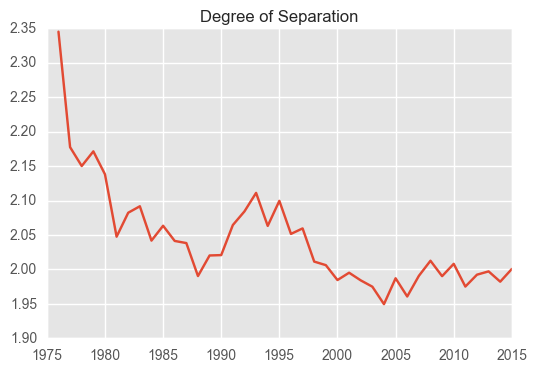

Traceback (most recent call last):
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/logging/__init__.py", line 861, in emit
    msg = self.format(record)
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/logging/__init__.py", line 734, in format
    return fmt.format(record)
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 117, in format
    return super(LevelFormatter, self).format(record)
TypeError: super(type, obj): obj must be an instance or subtype of type
Logged from file kernelbase.py, line 230


ERROR! Session/line number was not unique in database. History logging moved to new session 1307


Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/atexit.py", line 24, in _run_exitfuncs
    func(*targs, **kargs)
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 3212, in atexit_operations
    self.history_manager.end_session()
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/IPython/core/history.py", line 579, in end_session
    self.writeout_cache()
  File "<decorator-gen-22>", line 2, in writeout_cache
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/IPython/core/history.py", line 60, in needs_sqlite
    return f(self, *a, **kw)
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/site-packages/IPython/core/history.py", line 798, in writeout_cache
    self.db_input_cache = []
  File "/Users/xueyingbi/DataScienceProjects/Anaconda/lib/python2.7/sit

In [ ]:
sns.plt.plot(y, degree75_15)
sns.plt.title('Degree of Separation', fontsize=12)
plt.savefig('DoS.png', dpi=1000)

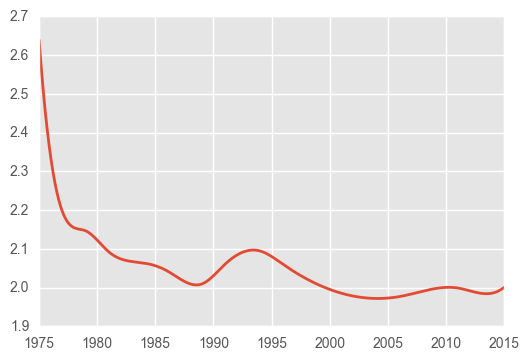

In [418]:
spl = UnivariateSpline(y, degree75_15)
xs = np.linspace(1975,2015, 1000)
spl.set_smoothing_factor(.01)
plt.plot(xs, spl(xs), linewidth = 2)

In [3]:
df_gp = pd.read_csv('greyparrot.csv')

In [4]:
df_gp.head()

,Unnamed: 0,Year,Taxon,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,372576,1989.0,Psittacus erithacus,US,BZ,NaN,2.0,live,NaN,NaN,W
1,382584,1990.0,Psittacus erithacus,US,TZ,1.0,1.0,live,NaN,T,W
2,386936,1990.0,Psittacus erithacus,JP,SG,80.0,80.0,live,NaN,T,W
3,386938,1990.0,Psittacus erithacus,JP,SG,70.0,70.0,live,NaN,T,W
4,386940,1990.0,Psittacus erithacus,JP,SG,30.0,30.0,live,NaN,T,W


In [207]:
df_gp14=df_gp[df_gp['Year'].isin([1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005])]

#1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
#2006,2007,2008,2009,2010,2011,2012,2013,2014,2015

In [208]:
Ggp = df_gp14[['Importer','Exporter','Exporter reported quantity']]

In [209]:
G1 = nx.from_pandas_dataframe(Ggp, 'Exporter', 'Importer', ['Exporter reported quantity'], create_using=nx.DiGraph())

In [210]:
# pr = nx.betweenness_centrality(G1,normalized=True)
pr = nx.pagerank(G1)

In [199]:
print OrderedDict(sorted(pr.items(), key=lambda t: t[1]))

OrderedDict([('BI', 0.00300531428719774), ('GQ', 0.00300531428719774), ('GG', 0.00300531428719774), ('GN', 0.00300531428719774), ('GL', 0.00300531428719774), ('ZM', 0.00300531428719774), ('ZW', 0.00300531428719774), ('CR', 0.00300531428719774), ('CV', 0.00300531428719774), ('SE', 0.00300531428719774), ('YE', 0.00300531428719774), ('TD', 0.00300531428719774), ('TZ', 0.00300531428719774), ('HN', 0.0031913644271719653), ('LI', 0.0032938669973823632), ('SY', 0.0033960073483941065), ('SD', 0.003431069536274488), ('BW', 0.0034469599564571473), ('AR', 0.0034469599564571473), ('GH', 0.0036371631804017228), ('JP', 0.0036765066924204616), ('TW', 0.0036765066924204616), ('MU', 0.0037206755189237908), ('TG', 0.003734250655138387), ('KR', 0.003734417336185812), ('JO', 0.003823213320375948), ('MM', 0.0038625568323946867), ('HU', 0.0039271753012343905), ('FI', 0.0039271753012343905), ('CG', 0.0039271753012343905), ('CY', 0.0039271753012343905), ('BF', 0.00402280336532301), ('KZ', 0.004158857069822292

In [ ]:
#('CZ', 0.016318353484641404), ('CH', 0.01662556802468565), ('KE', 0.017136429709886276), ('SN', 0.018865104247868636),
#('NE', 0.020737155570139474), ('CA', 0.02275134792835812), ('DE', 0.028101388274186324), ('ZA', 0.04306757962778916),
#('FR', 0.061390951677261156), ('US', 0.07118744792929187)])

#('EG', 0.013758711080075212), ('PT', 0.014042248979896747), ('XX', 0.014221941138049352), ('MX', 0.015619387709471156),
#('AE', 0.016687752476969443), ('CH', 0.016834690960751714), ('CA', 0.023361514873909944), ('GB', 0.029773292616132967),
#('DE', 0.03682745153739759), ('FR', 0.048503535599474096), ('US', 0.11056031396063078)])

In [220]:
df_gp[df_gp['Exporter']=='ZA']

,Unnamed: 0,Year,Taxon,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
6,390025,1990.0,Psittacus erithacus,IT,ZA,1.0,1.0,live,NaN,P,W
7,390031,1990.0,Psittacus erithacus,US,ZA,1.0,1.0,live,NaN,NaN,W
67,445902,1991.0,Psittacus erithacus,CA,ZA,NaN,1.0,live,NaN,P,W
68,445909,1991.0,Psittacus erithacus,DE,ZA,NaN,1.0,live,NaN,P,W
69,445924,1991.0,Psittacus erithacus,PT,ZA,2.0,2.0,live,NaN,P,W
214,502679,1992.0,Psittacus erithacus,NaN,ZA,NaN,2.0,live,NaN,T,W
383,559860,1993.0,Psittacus erithacus,FR,ZA,1.0,1.0,live,NaN,P,W
384,559862,1993.0,Psittacus erithacus,GB,ZA,1.0,1.0,live,NaN,P,W
385,559872,1993.0,Psittacus erithacus,NaN,ZA,NaN,2.0,live,NaN,T,W
386,559881,1993.0,Psittacus erithacus,SG,ZA,NaN,100.0,live,NaN,T,W


In [69]:
totex = {}

# Calculate total exports of each country in the network
for ex in G1.nodes(): 
     tx=sum([float(g) for im,ex,g in G1.out_edges_iter(ex, 'Exporter reported quantity')])
     totex[ex] = tx
     avgexp = np.mean(tx)

print totex

{'BE': 5.0, 'FR': 1.0, 'UA': 907.0, 'DE': 2.0, 'YE': 0, 'BI': 0, 'BJ': 0, 'HU': 402.0, 'DZ': 2.0, 'RU': 437.0, 'ZW': 0, 'LB': 2.0, 'CM': 270.0, 'PT': 4.0, 'TR': 20.0, 'NE': 5.0, 'NG': 15.0, 'CU': 0, 'CF': 0, 'TG': 0, 'TD': 0, 'ZM': 0, 'CH': 1.0, 'AE': 200.0, 'GQ': 0, 'ZA': 3.0, 'AO': 4.0, 'CD': 3.0, 'GG': 0, 'MY': 38.0, 'GA': 13.0, 'GN': 7942.0, 'GL': 0, 'ES': 4.0, 'GH': 2.0, 'OM': 300.0, 'TZ': 0, 'ML': 1.0, 'US': 17.0, 'KW': 2.0, 'SN': 2.0, 'SD': 1498.0, 'SG': 742.0, 'MX': 18.0, 'SE': 2204.0, 'MZ': 16.0}


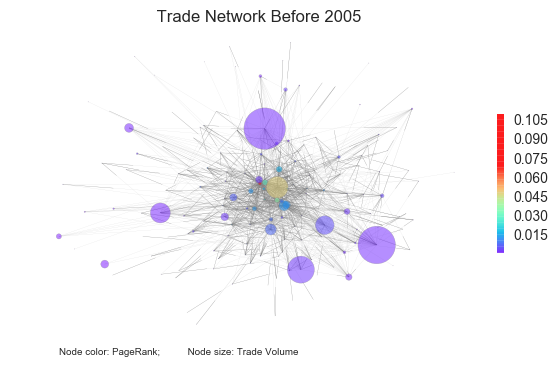

In [214]:
# Set this as a node attribute for each node
nx.set_node_attributes(G1, 'PageRank', pr)

# Use this measure to determine the node color in viz
node_color = [float(G1.node[v]['PageRank']) for v in G1]

totim = {}

# Calculate total exports of each country in the network
for im in G1.nodes(): 
     tx=sum([float(g) for im,ex,g in G1.out_edges_iter(im, 'Exporter reported quantity')])
     totim[im] = tx
     avgexp = np.mean(tx)
nx.set_node_attributes(G1, 'totim', totim)

# Use the results later for the node's size in the graph
node_size = [(float(G1.node[v]['totim']) / avgexp)*0.2 for v in G1]


# Visualization
# Calculate position of each node in G using networkx spring layout
pos = nx.spring_layout(G1,k=0.1,iterations=8) 

# Draw nodes
nodes = nx.draw_networkx_nodes(G1,pos,  \
                               node_color=node_color, node_size=node_size, alpha=0.5, cmap=plt.get_cmap('rainbow')) 
# Draw edges
edges = nx.draw_networkx_edges(G1, pos, edge_color='grey', \
                               arrows=True, width=0.05,alpha=0.7)

# Add labels
# nx.draw_networkx_labels(G1,pos,font_size=5)
nodes.set_edgecolor('grey')

# Add labels and title
plt.text(0,-0.1, \
         'Node color: PageRank; \
         Node size: Trade Volume', \
         fontsize=7)
plt.title(' Trade Network Before 2005', fontsize=12)

# Bar with color scale for eigenvalues
cbar = plt.colorbar(mappable=nodes, cax=None, ax=None, fraction=0.015, pad=0.05)
cbar.set_clim(0, 0.07)

# Plot options
plt.margins(0,0)
plt.axis('off')
plt.savefig('gp_pr_2005.png', dpi=500)

In [183]:
plt.savefig('gp_pr_2005.png', dpi=500)